In [106]:
# !pip install IPython

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from IPython.display import Image
plt.rcParams["font.family"] = "Arial Unicode MS"

import os
import warnings
warnings.filterwarnings('ignore')

# 파일이 있는 현재 위치를 path로 지정
current_directory = os.getcwd()
path = current_directory.replace('\\', '/')
path += '/' if not path.endswith('/') else ''

data_path = path + "data/"
print("Data_path :", data_path)

img_path = path + "img/"
print("IMG_path :", img_path)

#필요시 path 재조정
# path = 'C:/Users/sook7/미래에솦_주피터/본선코드정리/'
# data_path = path + "data/"
# img_path = path + "img/"

Data_path : C:/Users/sook7/미래에솦_주피터/[빅데이터_미래에솦]소스코드/data/
IMG_path : C:/Users/sook7/미래에솦_주피터/[빅데이터_미래에솦]소스코드/img/


### 글꼴

In [108]:
#windows 실행시
from matplotlib import rc
import matplotlib.font_manager as fm
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = path + 'NanumGothic.ttf'
# 폰트 설정
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

#MAC 실행시
# plt.rcParams["font.family"] = "Arial Unicode MS"

## 지수 파생변수 생성
- DMST_AST_MKT는 월말일 기준 평가액 국내 주식 거래소를 의미하는 칼럼으로 고객이 어느 거래소에 현재 투자 비중이 높은지 알 수 있다.  
- DMST_AST1_MKT에서 4개월 동안 어느 거래소에 거래를 많이 했는지를 확인하여 지수 칼럼에 할당
- DMST_AST1_MKT가 동률일 경우 DMST_AST2_MKT를 비교하고 또 동률일 경우 DMST_AST3_MKT를 비교하여 고객이 주로 투자하는 거래소를 찾아 이후 있을 지수대비 증감률 파생변수를 만들때 사용했다. 


In [109]:
# df = pd.read_csv("cs_data.csv")
# df.fillna(0, inplace=True)

In [110]:
# for i in tqdm(df.index):
#     values_1 = df.loc[i, ["DMST_AST1_MKT_M1", "DMST_AST1_MKT_M2", "DMST_AST1_MKT_M3", "DMST_AST1_MKT_M4"]]
#     values_2 = df.loc[i, ["DMST_AST2_MKT_M1", "DMST_AST2_MKT_M2", "DMST_AST2_MKT_M3", "DMST_AST2_MKT_M4"]]
#     values_3 = df.loc[i, ["DMST_AST3_MKT_M1", "DMST_AST3_MKT_M2", "DMST_AST3_MKT_M3", "DMST_AST3_MKT_M4"]]
    
#     count1_kospi = values_1[values_1 == '코스피'].count()
#     count1_kosdaq = values_1[values_1 == '코스닥'].count()
#     count1_konex = values_1[values_1 == '코넥스'].count()
    
#     count2_kospi = values_2[values_2 == '코스피'].count()
#     count2_kosdaq = values_2[values_2 == '코스닥'].count()
#     count2_konex = values_2[values_2 == '코넥스'].count()
    
#     count3_kospi = values_3[values_3 == '코스피'].count()
#     count3_kosdaq = values_3[values_3 == '코스닥'].count()
#     count3_konex = values_3[values_3 == '코넥스'].count()

#     if count1_kospi > count1_kosdaq and count1_kospi > count1_konex:
#         df.loc[i, "지수"] = "코스피"
#     elif count1_kosdaq > count1_kospi and count1_kosdaq > count1_konex:
#         df.loc[i, "지수"] = "코스닥"
#     elif count1_konex > count1_kospi and count1_konex > count1_kosdaq:
#         df.loc[i, "지수"] = "코넥스"
#     else:
#         if count2_kospi > count2_kosdaq and count2_kospi > count2_konex:
#             df.loc[i, "지수"] = "코스피"
#         elif count2_kosdaq > count2_kospi and count2_kosdaq > count2_konex:
#             df.loc[i, "지수"] = "코스닥"
#         elif count2_konex > count2_kospi and count2_konex > count2_kosdaq:
#             df.loc[i, "지수"] = "코넥스"
#         else:
#             if count3_kospi > count3_kosdaq and count3_kospi > count3_konex:
#                 df.loc[i, "지수"] = "코스피"
#             elif count3_kosdaq > count3_kospi and count3_kosdaq > count3_konex:
#                 df.loc[i, "지수"] = "코스닥"
#             elif count3_konex > count3_kospi and count3_konex > count3_kosdaq:
#                 df.loc[i, "지수"] = "코넥스"
#             else:
#                 df.loc[i, "지수"] = "기타" 

In [111]:
# df["지수"].value_counts()

In [112]:
## 코넥스에서 매매한 고객은 1000명으로 매우 적어 코스닥으로 편입
## 3번의 필터링을 하였음에도 기타로 분류된 고객은 코스피로 편입

# df["지수"].replace({"코넥스": "코스닥"}, inplace=True)
# df["지수"].replace({"기타": "코스피"}, inplace=True)

In [113]:
# df.to_csv(path + "cs_data_지수.csv", index = False)

In [114]:
# df["지수"].value_counts()

# 고객의 투자성향 파악
### 1. 자산의 변동성
- 총자산편차, 지수대비증감률, 보유종목수
### 2. 투자의 적극성
- 현금성자산비율, 월평균 HTS or MTS 접속일수, 월평균 체결횟수, 월평균 거래가격
### 3. 투자 기간(장기, 단기)
- 투자기간
### 4. 공모주에 대한 관심
- 공모주 참여 개수

In [115]:
df = pd.read_csv(data_path + "cs_data_지수.csv")
df.head(3)

,AGE_TCD,MT_EP_EXIST_YN,LST_BEST_EA,LST_BEST_YM,DMST_FST_BUY_YM,DMETF_FST_BUY_YM,OVST_FST_BUY_YM,OVETF_FST_BUY_YM,DMST_FIN_BUY_YM,DMETF_FIN_BUY_YM,...,CONN_DYS_M4_1,MTS_DYS_M4_1,HTS_DYS_M4_1,CONN_DYS_M4_2,MTS_DYS_M4_2,HTS_DYS_M4_2,CONN_DYS_M4_3,MTS_DYS_M4_3,HTS_DYS_M4_3,지수
0,50,Y,300000000.0,202206,202007.0,202111.0,0.0,0.0,202205.0,202208.0,...,10.0,10.0,0.0,10.0,10.0,0.0,11.0,11.0,0.0,코스피
1,60,N,220000000.0,201711,201912.0,0.0,0.0,0.0,202210.0,0.0,...,8.0,7.0,3.0,4.0,4.0,0.0,9.0,9.0,1.0,코스피
2,40,N,44000000.0,202206,202105.0,0.0,202111.0,202111.0,202211.0,0.0,...,9.0,9.0,0.0,9.0,9.0,0.0,10.0,10.0,0.0,코스닥


# 1. 자산의 변동성
    1. 총자산 편차 :고객이 얼마나 변동성 있는 투자를 하는지 확인하는 변수
    - 고객의 입출금으로 발생하는 증감을 없앤 순수하게 주식투자로 인한 평가자산의 변동을 확인하기위해 고객의 주식계좌에 있는 총자산에서 입출금 내역을 뺏습니다. 
      잔고데이터 = 국내 주식 평가액 + 해외 주식 평가액 + 현금성 자산 - 입출금금액 - 주식입출고 금액으로 각 월별 잔고데이터를 만들었고 해당 데이터의 표준편차를 구해 총자산편차 변수를 생성
    i) 총자산편차가 작은 것은 리스크가 높은 투자를 하지 않음  
    ii) 총자산편차가 높은 것은 리스크가 높은 투자를 함
    
    2. 지수 대비 증감률 : 고객이 지수 대비 얼마나 변동성 있는 투자를 하는지 확인하는 변수
    kospi, kosdaq : https://kosis.kr/statHtml/statHtml.do?orgId=343&tblId=DT_343_2010_S0027&conn_path=I2
    
    고객마다 매매를 하는 거래소가 다르기에 지수 대비 증감률을 고려할때 고객이 주로 거래하는 거래소 대비 증감률을 확인하고자 지수 칼럼을 생성
    - 지수 대비 고객이 어떠한 투자를 하고 있는지 알기 위해 해당 기간(22년 12월 ~ 23년 3월)의 코스피, 코스닥 지수 대비 고객의 잔고데이터 증감률 파생변수를 만들었다.  
    코넥스를 투자하는 사람의 경우 1000명 정도로 미미하여 코스닥에 포함시켜 진행하였다.
    
    3. 월평균 보유종목수 : 집중투자를 하는 고객인지 분산투자를 하는 고객인지를 구분해주는 변수

## 1-1. 총자산편차
- 고객이 얼마나 변동성 있는 투자를 하는지 확인하는 변수

In [116]:
# 월별 입출금 합계
df["입출금_M1"] = df["MNY_IN_M1_1"] + df["MNY_IN_M1_2"] + df["MNY_IN_M1_3"] - df["MNY_OUT_M1_1"] - df["MNY_OUT_M1_2"] - df["MNY_OUT_M1_3"]
df["입출금_M2"] = df["MNY_IN_M2_1"] + df["MNY_IN_M2_2"] + df["MNY_IN_M2_3"] - df["MNY_OUT_M2_1"] - df["MNY_OUT_M2_2"] - df["MNY_OUT_M2_3"]
df["입출금_M3"] = df["MNY_IN_M3_1"] + df["MNY_IN_M3_2"] + df["MNY_IN_M3_3"] - df["MNY_OUT_M3_1"] - df["MNY_OUT_M3_2"] - df["MNY_OUT_M3_3"]
df["입출금_M4"] = df["MNY_IN_M4_1"] + df["MNY_IN_M4_2"] + df["MNY_IN_M4_3"] - df["MNY_OUT_M4_1"] - df["MNY_OUT_M4_2"] - df["MNY_OUT_M4_3"]

# 월별 주식 입출고액 합계
df["주식입출고_M1"] = df["STK_IN_M1_1"] + df["STK_IN_M1_2"] + df["STK_IN_M1_3"] - df["STK_OUT_M1_1"] - df["STK_OUT_M1_2"] - df["STK_OUT_M1_3"]
df["주식입출고_M2"] = df["STK_IN_M2_1"] + df["STK_IN_M2_2"] + df["STK_IN_M2_3"] - df["STK_OUT_M2_1"] - df["STK_OUT_M2_2"] - df["STK_OUT_M2_3"]
df["주식입출고_M3"] = df["STK_IN_M3_1"] + df["STK_IN_M3_2"] + df["STK_IN_M3_3"] - df["STK_OUT_M3_1"] - df["STK_OUT_M3_2"] - df["STK_OUT_M3_3"]
df["주식입출고_M4"] = df["STK_IN_M4_1"] + df["STK_IN_M4_2"] + df["STK_IN_M4_3"] - df["STK_OUT_M4_1"] - df["STK_OUT_M4_2"] - df["STK_OUT_M4_3"]

# 잔고데이터 = 국내 주식 평가액 + 해외 주식 평가액 + 현금성 자산 - 입출금 금액 - 주식 입출고액
df["잔고데이터_M1"] = df["DMST_AST_EVAL_M1"] + df["OVST_AST_EVAL_M1"] + df["CASH_AST_M1"] - df["입출금_M1"] - df["주식입출고_M1"]
df["잔고데이터_M2"] = df["DMST_AST_EVAL_M2"] + df["OVST_AST_EVAL_M2"] + df["CASH_AST_M2"] - df["입출금_M2"] - df["주식입출고_M2"]
df["잔고데이터_M3"] = df["DMST_AST_EVAL_M3"] + df["OVST_AST_EVAL_M3"] + df["CASH_AST_M3"] - df["입출금_M3"] - df["주식입출고_M3"]
df["잔고데이터_M4"] = df["DMST_AST_EVAL_M4"] + df["OVST_AST_EVAL_M4"] + df["CASH_AST_M4"] - df["입출금_M4"] - df["주식입출고_M4"]

# 총자산편차
df["총자산편차"] = df[["잔고데이터_M1", "잔고데이터_M2", "잔고데이터_M3", "잔고데이터_M4"]].std(axis=1)

## 1-2. 지수 대비 자산 증감률
- 고객이 지수 대비 얼마나 변동성 있는 투자를 하는지 확인하는 변수

#### 컴퓨터 환경마다 인코딩 방법이 다를 수 있습니다. 개인의 환경에 맞게 인코딩 방법을 수정해주세요!

In [117]:
kospi = pd.read_csv(data_path + "data_코스피(12월~3월).csv", encoding='euc-kr')
kosdaq = pd.read_csv(data_path + "data_코스닥(12월~3월).csv", encoding='euc-kr')

In [118]:
kospi = kospi[["2022.12", "2023.01", "2023.02", "2023.03"]]
kosdaq = kosdaq[["2022.12", "2023.01", "2023.02", "2023.03"]]

kospi_말일종가 = kospi.iloc[1, :]
kospi_말일종가 = kospi_말일종가.astype(float)
kospi_4개월증감률 = ((kospi_말일종가[3] - kospi_말일종가[0])/kospi_말일종가[0])*100
print(kospi_4개월증감률)

kosdaq_말일종가 = kosdaq.iloc[0, :]
kosdaq_말일종가 = kosdaq_말일종가.astype(float)
kosdaq_4개월증감률 = ((kosdaq_말일종가[3] - kosdaq_말일종가[0])/kosdaq_말일종가[0])*100
print(kosdaq_4개월증감률)

10.752101591844037
24.765564044811498


In [119]:
df["증감률"] = ((df["잔고데이터_M4"]-df["잔고데이터_M1"])/df["잔고데이터_M1"]) * 100

In [120]:
# 증감률이 -inf, inf NaN인 경우 1502개로 매우 미미하여 평균치로 대체
len(df[df["증감률"].isin([-np.inf, np.inf, np.nan])])

1484

In [121]:
# -inf, inf가 존재하면 평균을 내기 어려워 결측치로 바꿔준 후 평균치로 대체해주었다.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df["증감률"].fillna(df["증감률"].mean(), inplace=True)

In [122]:
# 코스피를 투자하는 고객은 코스피 지수 대비 증감률을 코스닥을 투자하는 고객은 코스닥 지수 대비 증감률을 구함
for i in df.index:
    if df["지수"][i] == "코스피":
        df.loc[i, "지수대비증감률"] = df["증감률"][i] - kospi_4개월증감률
    else:
        df.loc[i, "지수대비증감률"] = df["증감률"][i] - kosdaq_4개월증감률

## 1-3. 월평균 보유 종목 수
- 집중투자를 하는 고객인지 분산투자를 하는 고객인지를 구분해주는 변수

In [123]:
df["보유종목수"] = round((df["DMST_ITM_CNT_M1"] + df["DMST_ITM_CNT_M2"] + df["DMST_ITM_CNT_M3"] + df["DMST_ITM_CNT_M4"] + df["OVST_ITM_CNT_M1"] + df["OVST_ITM_CNT_M2"] + df["OVST_ITM_CNT_M3"] + df["OVST_ITM_CNT_M4"]) / 4)
df["보유종목수"].astype("int")

0          2
1         11
2         34
3          0
4          3
          ..
803303     1
803304    34
803305     3
803306     1
803307     8
Name: 보유종목수, Length: 803308, dtype: int32

# 2. 투자 적극성
    1. 현금성자산비율 : 현금성자산비율의 크기로 투자의 적극성 확인
    - 현금성 비율이 적다 -> 주식에 적극적으로 투자하는 고객
    - 현금성 비율이 많다 -> 주식에 보수적으로 접근하며 안정적인 투자를 하는 고객

    2. 월평균 HTS or MTS 접속일수 : 고객이 주식투자에 얼마나 관심이 있는지 확인하는 변수
    -> 해당일의 접속일수를 보기 위함이므로 중복 접속을 고려하지 않음
    
    3. 월평균 매수 + 매도 체결횟수 : 고객이 주식 거래를 얼마나 자주 하는지 확인하는 변수
    
    4. 월평균 거래가격 : 고객이 주식투자를 얼마나 규모있게 하는지 확인하는 변수

## 2-1. 현금성자산비율
- 현금성자산비율의 크기로 투자의 적극성 확인

In [124]:
df["현금성자산비율_M1"] = df["CASH_AST_M1"] / (df["DMST_AST_EVAL_M1"] + df["OVST_AST_EVAL_M1"] + df["CASH_AST_M1"])*100
df["현금성자산비율_M2"] = df["CASH_AST_M2"] / (df["DMST_AST_EVAL_M2"] + df["OVST_AST_EVAL_M2"] + df["CASH_AST_M2"])*100
df["현금성자산비율_M3"] = df["CASH_AST_M3"] / (df["DMST_AST_EVAL_M3"] + df["OVST_AST_EVAL_M3"] + df["CASH_AST_M3"])*100
df["현금성자산비율_M4"] = df["CASH_AST_M4"] / (df["DMST_AST_EVAL_M4"] + df["OVST_AST_EVAL_M4"] + df["CASH_AST_M4"])*100

In [125]:
# NaN값은 평균 대체
df.fillna(0, inplace=True)
df["현금성자산비율_M1"].replace(0, df["현금성자산비율_M1"].mean(), inplace=True)
df["현금성자산비율_M2"].replace(0, df["현금성자산비율_M2"].mean(), inplace=True)
df["현금성자산비율_M3"].replace(0, df["현금성자산비율_M3"].mean(), inplace=True)
df["현금성자산비율_M4"].replace(0, df["현금성자산비율_M4"].mean(), inplace=True)

In [126]:
df["현금성자산비율"] = df[["현금성자산비율_M1", "현금성자산비율_M2", "현금성자산비율_M3", "현금성자산비율_M4"]].mean(axis=1)

In [127]:
df["현금성자산비율"]

0          8.833605
1          9.070525
2          0.154073
3         86.813187
4         71.781305
            ...    
803303     4.587397
803304     0.214197
803305     5.734363
803306     0.161448
803307     3.418519
Name: 현금성자산비율, Length: 803308, dtype: float64

## 2-2. 월평균 HTS or MTS 접속일수
- 고객이 주식투자에 얼마나 관심이 있는지 확인하는 변수

In [128]:
df["CONN_DYS_M1"] = df["CONN_DYS_M1_1"] + df["CONN_DYS_M1_2"] + df["CONN_DYS_M1_3"]
df["CONN_DYS_M2"] = df["CONN_DYS_M2_1"] + df["CONN_DYS_M2_2"] + df["CONN_DYS_M2_3"]
df["CONN_DYS_M3"] = df["CONN_DYS_M3_1"] + df["CONN_DYS_M3_2"] + df["CONN_DYS_M3_3"]
df["CONN_DYS_M4"] = df["CONN_DYS_M4_1"] + df["CONN_DYS_M4_2"] + df["CONN_DYS_M4_3"]

df["접속일수"] = (df["CONN_DYS_M1"] + df["CONN_DYS_M2"] + df["CONN_DYS_M3"] + df["CONN_DYS_M4"]) / 4

df["접속일수"] = df["접속일수"].astype(int)
df["접속일수"].value_counts()

## MTS, HTS 모두 동시접속한 날이 있는 고객의 경우 각각의 합이 더 큰 경우가 있다고 했지만
## 해당일의 접속일수를 보기 위함이기에 중복 접속을 고려하지 않음

21    65417
22    54918
23    42199
20    42101
24    33382
3     33366
2     32923
4     30787
19    28665
25    28286
5     28109
6     25917
26    25512
18    24454
7     23924
8     22347
17    22164
27    21557
9     21390
16    20821
10    20488
15    20349
11    20210
12    19856
14    19767
13    19459
1     18130
28    17384
29    13616
30     5810
Name: 접속일수, dtype: int64

In [129]:
# 월평균 0회 접속한 사람이 없는것으로 볼때 유령계좌는 포함되어있지 않다.

df[df["접속일수"]==0]

,AGE_TCD,MT_EP_EXIST_YN,LST_BEST_EA,LST_BEST_YM,DMST_FST_BUY_YM,DMETF_FST_BUY_YM,OVST_FST_BUY_YM,OVETF_FST_BUY_YM,DMST_FIN_BUY_YM,DMETF_FIN_BUY_YM,...,현금성자산비율_M1,현금성자산비율_M2,현금성자산비율_M3,현금성자산비율_M4,현금성자산비율,CONN_DYS_M1,CONN_DYS_M2,CONN_DYS_M3,CONN_DYS_M4,접속일수


<AxesSubplot:xlabel='접속일수', ylabel='Density'>

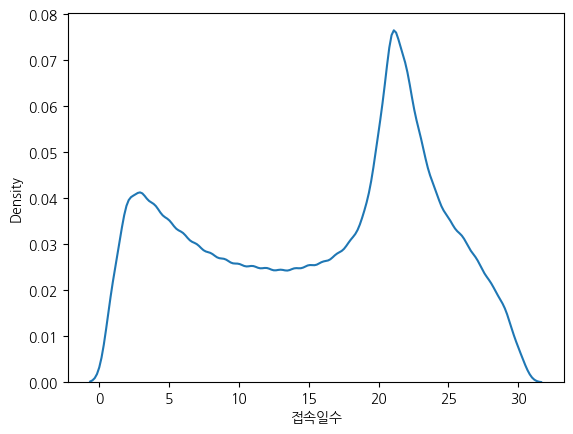

In [130]:
sns.kdeplot(df.접속일수)

## 한달에 22일정도 개장된다고 볼때 매일 접속하는 사람이 제일 많았다.
## -> 데이트레이더 or 단기투자하는 사람이 많다고 추측가능
## 장기투자하는 사람도 하루에 한번씩 시세를 확인할 수 있기에 확신 불가
## 한달에 4회정도 보는 사람과 22일 정도 보는 사람이 높게 나오는걸 볼때 투자 성향이 나뉘는 고객군이 있는걸로 확인

## 2-3. 월평균 주식 매수, 매도 체결횟수의 합
- 고객이 주식 거래를 얼마나 자주 하는지 확인하는 변수

In [131]:
df["BUY_CNT_M1"] = df["BUY_CNT_M1_1"] + df["BUY_CNT_M1_2"] + df["BUY_CNT_M1_3"]
df["BUY_CNT_M2"] = df["BUY_CNT_M2_1"] + df["BUY_CNT_M2_2"] + df["BUY_CNT_M2_3"]
df["BUY_CNT_M3"] = df["BUY_CNT_M3_1"] + df["BUY_CNT_M3_2"] + df["BUY_CNT_M3_3"]
df["BUY_CNT_M4"] = df["BUY_CNT_M4_1"] + df["BUY_CNT_M4_2"] + df["BUY_CNT_M4_3"]

df["SEL_CNT_M1"] = df["SEL_CNT_M1_1"] + df["SEL_CNT_M1_2"] + df["SEL_CNT_M1_3"]
df["SEL_CNT_M2"] = df["SEL_CNT_M2_1"] + df["SEL_CNT_M2_2"] + df["SEL_CNT_M2_3"]
df["SEL_CNT_M3"] = df["SEL_CNT_M3_1"] + df["SEL_CNT_M3_2"] + df["SEL_CNT_M3_3"]
df["SEL_CNT_M4"] = df["SEL_CNT_M4_1"] + df["SEL_CNT_M4_2"] + df["SEL_CNT_M4_3"]


df["체결횟수_M1"] = df["BUY_CNT_M1"] + df["SEL_CNT_M1"]
df["체결횟수_M2"] = df["BUY_CNT_M2"] + df["SEL_CNT_M2"]
df["체결횟수_M3"] = df["BUY_CNT_M3"] + df["SEL_CNT_M3"]
df["체결횟수_M4"] = df["BUY_CNT_M4"] + df["SEL_CNT_M4"]

df["체결횟수"] = (df["체결횟수_M1"] + df["체결횟수_M2"] + df["체결횟수_M3"] + df["체결횟수_M4"])/4

df["체결횟수"] = df["체결횟수"].astype(int)
df["체결횟수"].value_counts()

## 매매하지 않은 사람의 수가 압도적임
## 체결횟수는 횟수에 따라 빈도가 확연히 줄어드는 추세
## 긴 시계열을 투자하는 고객이 많다고 추정

0       340406
1        87196
2        49557
3        33826
4        24906
         ...  
1488         1
1367         1
1306         1
1351         1
1407         1
Name: 체결횟수, Length: 1593, dtype: int64

## 2-4. 월평균 거래가격
- 고객이 주식투자를 얼마나 규모있게 하는지 확인하는 변수

In [132]:
df["BUY_AMT_M1"] = df["BUY_AMT_M1_1"] + df["BUY_AMT_M1_2"] + df["BUY_AMT_M1_3"]
df["BUY_AMT_M2"] = df["BUY_AMT_M2_1"] + df["BUY_AMT_M2_2"] + df["BUY_AMT_M2_3"]
df["BUY_AMT_M3"] = df["BUY_AMT_M3_1"] + df["BUY_AMT_M3_2"] + df["BUY_AMT_M3_3"]
df["BUY_AMT_M4"] = df["BUY_AMT_M4_1"] + df["BUY_AMT_M4_2"] + df["BUY_AMT_M4_3"]

df["SEL_AMT_M1"] = df["SEL_AMT_M1_1"] + df["SEL_AMT_M1_2"] + df["SEL_AMT_M1_3"]
df["SEL_AMT_M2"] = df["SEL_AMT_M2_1"] + df["SEL_AMT_M2_2"] + df["SEL_AMT_M2_3"]
df["SEL_AMT_M3"] = df["SEL_AMT_M3_1"] + df["SEL_AMT_M3_2"] + df["SEL_AMT_M3_3"]
df["SEL_AMT_M4"] = df["SEL_AMT_M4_1"] + df["SEL_AMT_M4_2"] + df["SEL_AMT_M4_3"]


df["거래가격_M1"] = df["BUY_AMT_M1"] + df["SEL_AMT_M1"]
df["거래가격_M2"] = df["BUY_AMT_M2"] + df["SEL_AMT_M2"]
df["거래가격_M3"] = df["BUY_AMT_M3"] + df["SEL_AMT_M3"]
df["거래가격_M4"] = df["BUY_AMT_M4"] + df["SEL_AMT_M4"]


df["거래가격"] = (df["거래가격_M1"] + df["거래가격_M2"] + df["거래가격_M3"] + df["거래가격_M4"])/4
df["거래가격"].value_counts()

0.0            194033
250000.0         2483
275000.0         1767
300000.0         1512
500000.0         1376
                ...  
421350000.0         1
156138750.0         1
58003250.0          1
76700.0             1
96811250.0          1
Name: 거래가격, Length: 109742, dtype: int64

# 3. 장기, 단기 투자
- 고객데이터의 이전 6개월 매도액 비중 변수 6개를 활용

당일 : 데이트레이딩, 5일이내 : 스윙투자, 30일이내 : 월간투자, 180일이내 : 반기투자, 1년이내 : 중기투자, 1년이후 : 장기투자  
### 22년 6월부터 11월까지 매도액 비중이 없는 사람들에 대한 분류 기준 
-> 22년 6월부터 11월까지 매도액 비중이 없는 사람들을 단순히 유령계좌로 분류하지 않았다. 받은 고객데이터가 6개월로 시계열이 짧기에 6개월 동안 매도를 하지 않은 반기 이상의 투자자들에 대해 23년 12월부터 3월까지의 주식 잔고와 월평균 거래가격 월평균 체결횟수를 함께 고려하여 세밀하게 분류하였다. 


1. 매도액 비중이 없는데 주식 잔고와 거래가격 체결횟수가 모두 0인 사람 : 유령계좌
2. 매도액 비중이 없는데 주식 잔고를 보유하고 있고 거래가격 체결횟수가 0인 사람 : 장기투자자
3. 매도액 비중이 없는데 주식 잔고를 보유하고 있고 거래가격 체결횟수가 0이 아닌사람 : 매도액 비중이 6개월간 없기에 반기투자자 보다 긴시계열을 투자하지만 이후 4개월에서 거래를 하였다고 판단하여 중기투자자로 분류함.

In [133]:
df.rename(columns={"DAY_TR_RATIO" : "데이트레이딩", "SWING_TR_RATIO" : "스윙투자", "MONTHS_TR_RATIO":"월간투자", "MID_TR_RATIO" : "반기투자", "HLD_TR_RATIO" : "중기투자", "YEARS_TR_RATIO" : "장기투자"}, inplace=True)

In [134]:
# 이전 6개월 매도액의 비율 중 비중이 가장 큰 기간을 그 고객의 투자기간으로서 할당한다.
# ex) A고객의 SWING_TR_RATIO(스윙투자)의 값이 0.6이라면 스윙투자, 즉, 4로 A고객의 투자기간 변수의 값을 할당

# 비중이 같을 경우 농사 매매(장기투자)를 주로하면서 일부의 자금으로 트레이딩을 하는 고객들이라 판단하여 
# idxmax method는 값이 같을 경우 특성상 먼저나오는 변수로 할당을 해주기에 투자기간이 긴 시계열을 앞에 번호에 배치하여 값을 할당해주었다.

df["투자기간"] = df[["장기투자", "중기투자", "반기투자", "월간투자", "스윙투자", "데이트레이딩"]].idxmax(axis=1).map({"장기투자": 0, "중기투자": 1,"반기투자":2,"월간투자":3, "스윙투자": 4, "데이트레이딩": 5})

In [135]:
df["투자기간"].value_counts()

0    390060
2    153710
1     99766
4     72149
3     51035
5     36588
Name: 투자기간, dtype: int64

In [136]:
sell_ratio = df[["데이트레이딩","스윙투자", "월간투자", "반기투자", "중기투자", "장기투자"]]

In [137]:
# 3번 case, 3번 - 1번 - 2번 순서로 계속 덮어 씌울 예정
# 매도액 비중이 모두 0인 사람들이 모두 idxmax method 특성으로 인해 장기투자자로 분류가 되었기에 해당 과정을 통해 중기투자자로 값을 변경해주었다.

sell_ratio_zeros_index = sell_ratio[(sell_ratio == 0).all(axis=1)].index
df.loc[sell_ratio_zeros_index,"투자기간"]=1

In [138]:
df["투자기간"].value_counts()

1    341335
2    153710
0    148491
4     72149
3     51035
5     36588
Name: 투자기간, dtype: int64

In [139]:
# 1번, 2번, 3번을 구분하기 위한 주식 잔고 컬럼 생성

df["주식잔고_M1"] = df["DMST_AST_EVAL_M1"] + df["OVST_AST_EVAL_M1"]
df["주식잔고_M2"] = df["DMST_AST_EVAL_M2"] + df["OVST_AST_EVAL_M2"]
df["주식잔고_M3"] = df["DMST_AST_EVAL_M3"] + df["OVST_AST_EVAL_M3"]
df["주식잔고_M4"] = df["DMST_AST_EVAL_M4"] + df["OVST_AST_EVAL_M4"]

In [140]:
ddf = df[["주식잔고_M1","주식잔고_M2","주식잔고_M3","주식잔고_M4","거래가격", "체결횟수", "데이트레이딩","스윙투자", "월간투자", "반기투자", "중기투자", "장기투자"]]

In [141]:
# 1번 case : 매도액 비중이 없는데 주식 잔고와 거래가격 체결횟수가 모두 0인 사람(유령계좌)
# 각 행에서 모든 칼럼의 값이 0인지 확인하고 True인 개수를 세기
# -> 이전 6개월 동안 매매가 없고 12월-3월 기간에 주식 자산, 거래가격, 체결횟수가 모두 0인 고객은 유령계좌로 보고 drop

유령계좌_index = ddf[(ddf == 0).all(axis=1)].index

In [142]:
len(유령계좌_index)

3168

In [143]:
df = df.drop(유령계좌_index)

In [144]:
# 2번 case : 매도액 비중이 없는데 주식 잔고를 보유하고 있고 거래가격 체결횟수가 0인 사람(장기투자자)
# 22년 6-11에 매도를 하지 않은 사람 중 22년 12월 - 23년 3월까지 주식 자산이 있는데 거래가격 및 체결횟수가 0이라면 1년이상의 장기투자를 하는 사람으로 분류
# 22년 6-11에 매도를 하지 않은 사람 중 22년 12월 - 23년 3월까지 주식 자산이 있는데 거래가격 및 체결횟수가 0이 아니라면 중기투자로 분류
장기투자자_index = ddf[
    (ddf["주식잔고_M1"] != 0) & 
    (ddf["주식잔고_M2"] != 0) & 
    (ddf["주식잔고_M3"] != 0) & 
    (ddf["주식잔고_M4"] != 0) & 
    (ddf[["거래가격", "체결횟수", "데이트레이딩", "스윙투자", "월간투자", "반기투자", "중기투자", "장기투자"]] == 0).all(axis=1)
].index

In [145]:
len(장기투자자_index)

113229

In [146]:
# 중기투자자는 3번 case에서 이미 할당을 해주어 따로 변환해주지 않아도 됨.

df.loc[장기투자자_index, "투자기간"] = 0

In [147]:
df["투자기간"].value_counts()

0    261720
1    224938
2    153710
4     72149
3     51035
5     36588
Name: 투자기간, dtype: int64

In [148]:
df.reset_index(drop=True, inplace=True)

In [149]:
# 매도액 비중의 최대값이 중복이 나올경우 idxmax()함수의 특성상 먼저 나온 컬럼의 값으로 할당이 되기에
# 단기투자와 장기투자의 비중이 같다면 장기투자자로서 판단하여 장기투자자로 할당을 시키기위해 mapping을 투자 시계열이 긴 사람부터 했었다.
# 전처리가 끝난 후 시각적으로 인식하기 쉽게 시계열이 짧은 투자부터 긴 투자순으로 다시 변경하여 주었다.

df["투자기간"] = df["투자기간"].map({0: 5, 1: 4, 2: 3, 3: 2, 4: 1, 5: 0})

In [150]:
df["투자기간"].value_counts()

5    261720
4    224938
3    153710
1     72149
2     51035
0     36588
Name: 투자기간, dtype: int64

# 4. 공모주에 대한 관심

In [151]:
df["AGE_TCD"].value_counts()

## 연령대별 고객 수가 리니어하게 증가
## 아무래도 20대 고객들은 카카오뱅크와 비대면계좌개설 이벤트를 빨리 실시한 NH, 한국투자로 이동했고 전통강호 미래에셋은 과거부터 투자를 해온 어른들이 많은것으로 추정
## 20대의 점유율을 높이기 위한 서비스가 필요함. 혜택에 따라 수시로 거래 금융기관을 옮겨다니는 금융노마드의 성향을 띄는 2030세대의 이목을 끌만한 공모주 청약 판단 지표를 개발

50    260083
40    230292
60    137547
30    125485
20     46733
Name: AGE_TCD, dtype: int64

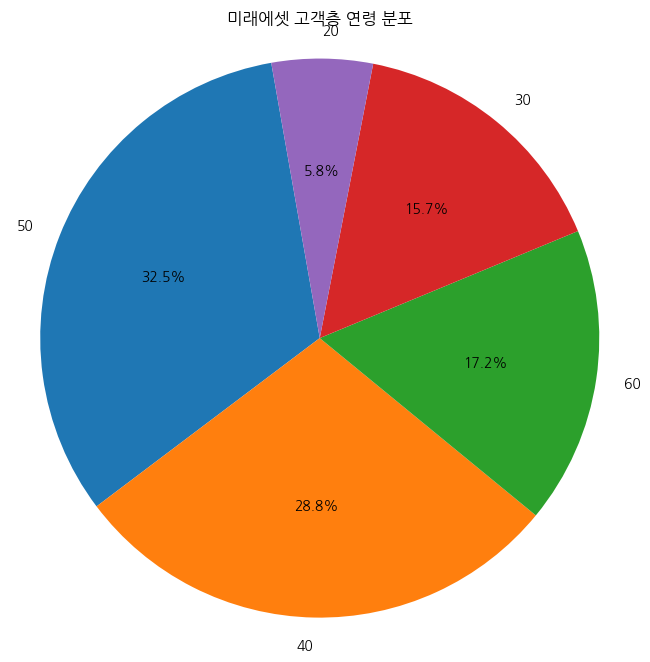

In [152]:
age_counts = df["AGE_TCD"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=100)
plt.title("미래에셋 고객층 연령 분포")
plt.axis('equal')
plt.show()

In [153]:
df.groupby("AGE_TCD")["APY_ITM_CNT"].mean()

## 자산이 커짐에따라 횟수가 증가하는것으로 확인

AGE_TCD
20    1.622408
30    2.312523
40    2.296406
50    2.298051
60    2.652853
Name: APY_ITM_CNT, dtype: float64

In [154]:
df.rename(columns = {"APY_ITM_CNT" : "공모횟수", "AGE_TCD":"연령"}, inplace=True)

# LDA 및 Clustering

In [155]:
# LDA, Clustering할 데이터셋

data = df[["연령", "총자산편차", "지수대비증감률", "보유종목수", "현금성자산비율", "접속일수", "체결횟수", "거래가격", "투자기간", "공모횟수"]]

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800140 entries, 0 to 800139
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   연령       800140 non-null  int64  
 1   총자산편차    800140 non-null  float64
 2   지수대비증감률  800140 non-null  float64
 3   보유종목수    800140 non-null  float64
 4   현금성자산비율  800140 non-null  float64
 5   접속일수     800140 non-null  int32  
 6   체결횟수     800140 non-null  int32  
 7   거래가격     800140 non-null  float64
 8   투자기간     800140 non-null  int64  
 9   공모횟수     800140 non-null  float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 54.9 MB


<AxesSubplot:>

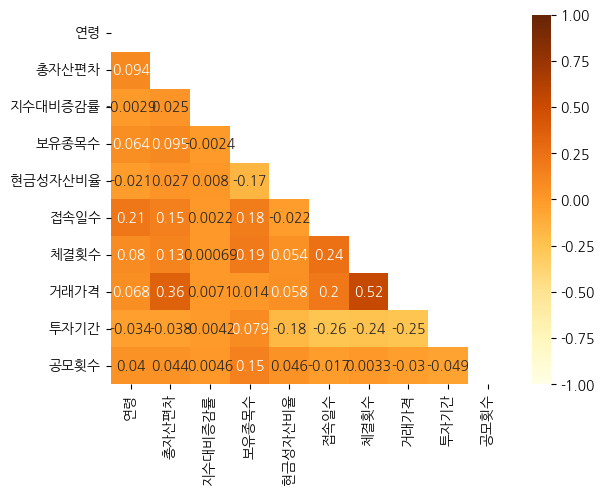

In [157]:
# 변수간 상관관계 확인
mask = np.zeros_like(data.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data.corr(), cmap='YlOrBr', annot=True, mask=mask, vmax=1, vmin=-1)

In [158]:
# 상관계수가 0.5가 넘는 거래가격 변수 제거
data.drop("거래가격", axis=1, inplace=True)

#### 이상치 확인
- 로그변환, 이상치제거

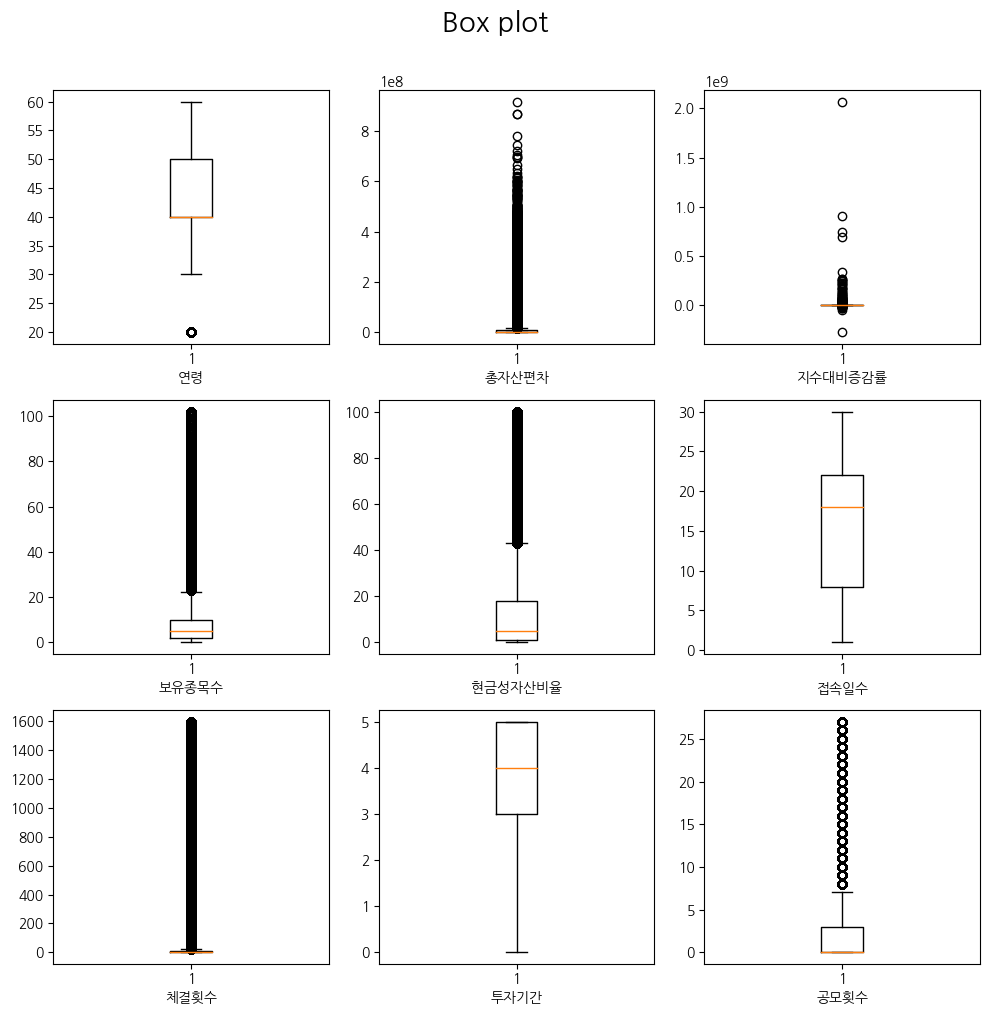

In [159]:
plt.figure(figsize=(10,10))
for i,col in enumerate(data.columns[:9]):
    plt.subplot(3,3,i+1)
    plt.boxplot(data[col])
    plt.xlabel(col)
plt.suptitle('Box plot', size=20, y=1.01)
plt.tight_layout()
plt.show()

## 이상치가 너무 많다.

#### 공모횟수 변수를 타겟으로 하는 LDA를 진행

In [160]:
y = data["공모횟수"]
X = data.drop("공모횟수", axis=1)

#### 로그 변환

In [161]:
# 로그변환할 변수 선택
columns_to_log = ["총자산편차", "보유종목수", "현금성자산비율", "체결횟수"]

# 로그 변환 수행
data_log = X[columns_to_log].apply(np.log1p)

# 로그 변환된 칼럼과 연령, 투자기간, 접속일수, 지수대비증감률 칼럼을 합치기
data_log = pd.concat([data_log, X[["연령", "투자기간", "접속일수", "지수대비증감률"]]], axis=1)

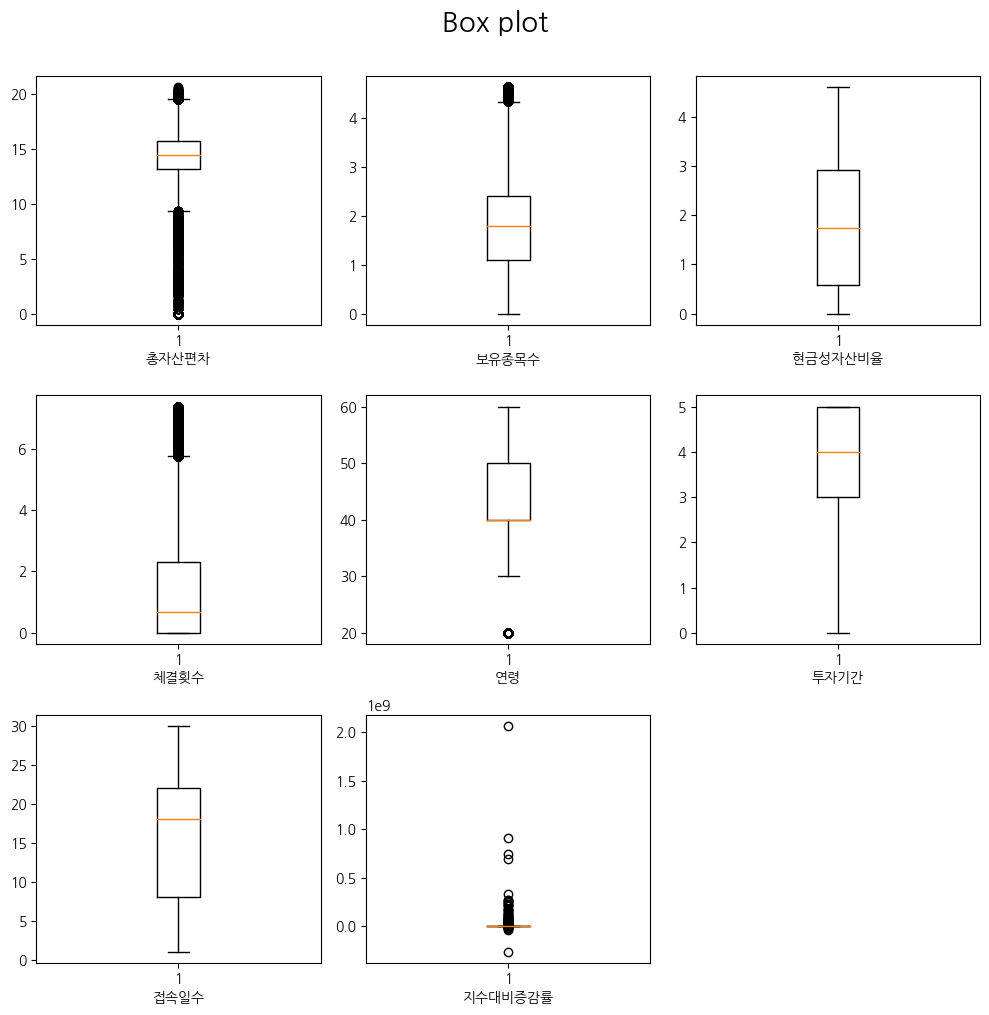

In [162]:
# 로그변환 후 이상치 개수 분포와 개수 확인
plt.figure(figsize=(10,10))
for i,col in enumerate(data_log.columns[:9]):
    plt.subplot(3,3,i+1)
    plt.boxplot(data_log[col])
    plt.xlabel(col)
plt.suptitle('Box plot', size=20, y=1.01)
plt.tight_layout()
plt.show()

In [163]:
# 데이터의 이상치가 너무 많아 1.5 * IQR 기준으로 이상치 제거시 고객데이터의 왜곡이 심해질 것을 고려하여 삭제
X.drop("총자산편차", axis=1, inplace=True)
data_log.drop("총자산편차", axis=1, inplace=True)

#### 이상치 제거
- 20대 고객의 수가 작아 이상치로 분류되는것을 확인하고 연령을 제외한 모든 변수에 이상치를 제거하였다.

In [164]:
def remove_outliers(df):
    # 이상치를 제거할 열 리스트
    remove_column = df.copy()
    remove_column.drop("연령", inplace=True, axis=1)
    columns_to_check = remove_column.columns

    # 이상치 제거
    for col in columns_to_check:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1

        # 이상치 상한치와 하한치 계산
        upper_bound = q3 + IQR * 1.5
        lower_bound = q1 - IQR * 1.5
        
        # 이상치 개수 카운트
        num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
      
        # 이상치 개수 출력
        print(f'{col} 변수에서 이상치 개수: {num_outliers}')

        # 이상치 제거
        df = df[df[col] <= upper_bound]
        df = df[df[col] >= lower_bound]

    return df

In [165]:
final_data = remove_outliers(data_log)

보유종목수 변수에서 이상치 개수: 1357
현금성자산비율 변수에서 이상치 개수: 0
체결횟수 변수에서 이상치 개수: 16569
투자기간 변수에서 이상치 개수: 0
접속일수 변수에서 이상치 개수: 0
지수대비증감률 변수에서 이상치 개수: 127675


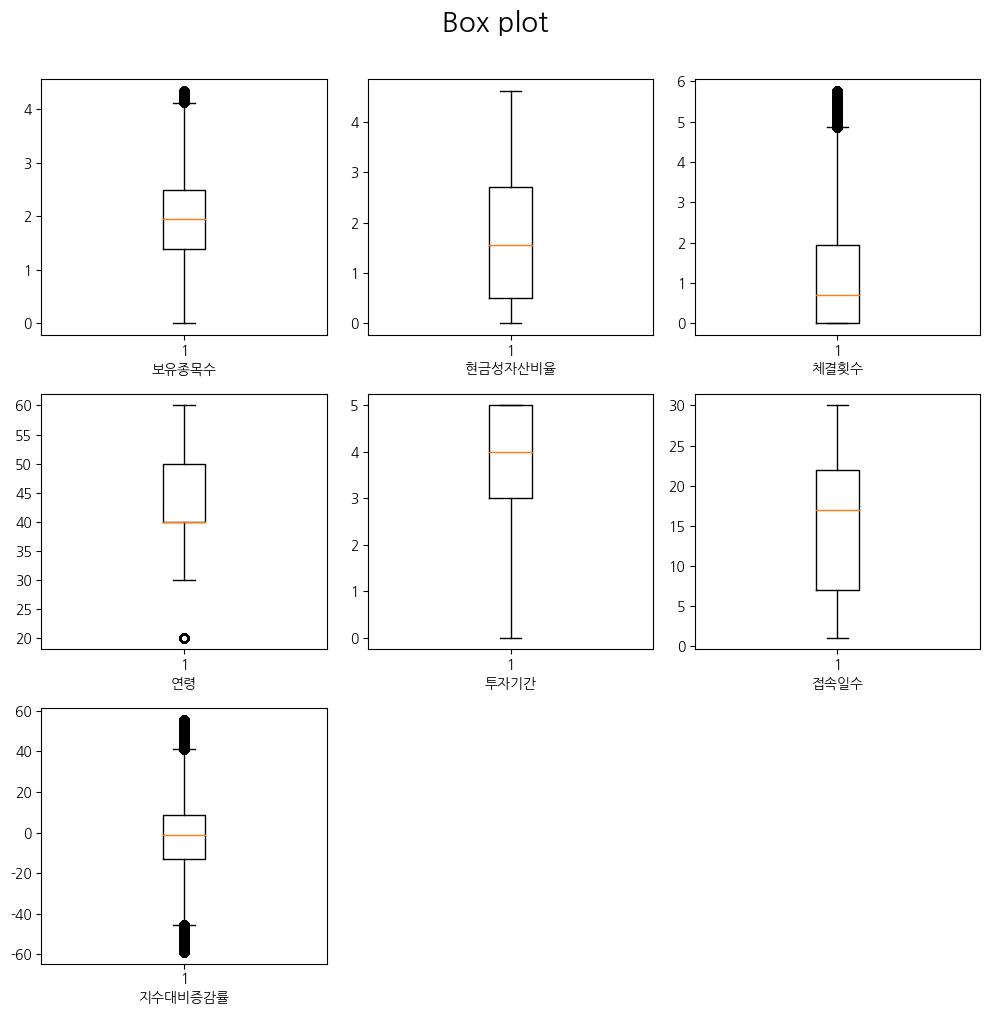

In [166]:
# 이상치 제거 후 이상치 개수 분포와 개수 확인
plt.figure(figsize=(10,10))
for i,col in enumerate(final_data.columns[:9]):
    plt.subplot(3,3,i+1)
    plt.boxplot(final_data[col])
    plt.xlabel(col)
plt.suptitle('Box plot', size=20, y=1.01)
plt.tight_layout()
plt.show()

#### 분포가 안정됨을 확인

In [167]:
# index 통일
final_data_index = final_data.index
data_original = X.loc[final_data_index,:]
y = y.loc[final_data_index,]

In [168]:
# index 초기화
final_data.reset_index(inplace=True, drop=True)
data_original.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

In [169]:
final_data.isnull().sum()

보유종목수      0
현금성자산비율    0
체결횟수       0
연령         0
투자기간       0
접속일수       0
지수대비증감률    0
dtype: int64

In [170]:
# 연령 label encoding
label_encoder = LabelEncoder()
final_data['연령'] = label_encoder.fit_transform(final_data['연령'])

In [171]:
# 표준화 진행
scaler = StandardScaler()
data_scaled = final_data.copy()
data_scaled[data_scaled.columns.difference(['연령', '투자기간'])] = scaler.fit_transform(data_scaled[data_scaled.columns.difference(['연령', '투자기간'])])

<AxesSubplot:>

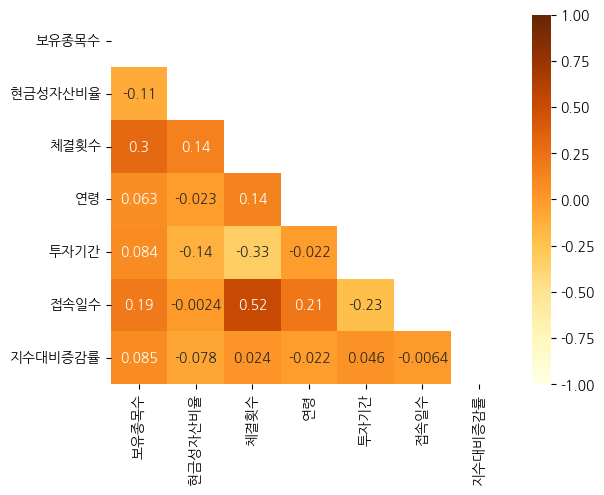

In [172]:
# 모든 전처리 완료 후 상관관계 확인
mask = np.zeros_like(data_scaled.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_scaled.corr(), cmap='YlOrBr', annot=True, mask=mask, vmax=1, vmin=-1)

## 1. LDA(Linear Discriminat Anlaysis)
- 클래스간 분리를 최대화하도록 주성분을 찾는 방법

#### LDA 선택이유
- 고객의 투자 성향을 파악할 수 있는 많은 파생변수를 PCA, t-SNE와 같은 차원축소 알고리즘으로 차원축소하여 고객을 clustering한다면 우리가 필요로하는 "공모횟수" 변수의 차이에 따른 고객들의 투자성향을 파악하기 어렵다고 생각하여 "공모횟수"를 타겟으로 하여 클래스가 분리가 최대화 되도록 차원축소를 진행하는 LDA를 선택하였다.

In [173]:
# 공모횟수를 타겟으로하는 LDA 진행
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(data_scaled, y)

## 2. K_means++ clustering
- elbow methods를 활용하여 3개의 군집으로 군집화 진행

### Elbow Method로 clustering할 최적의 군집수 탐색
- 최적의 군집은 3개

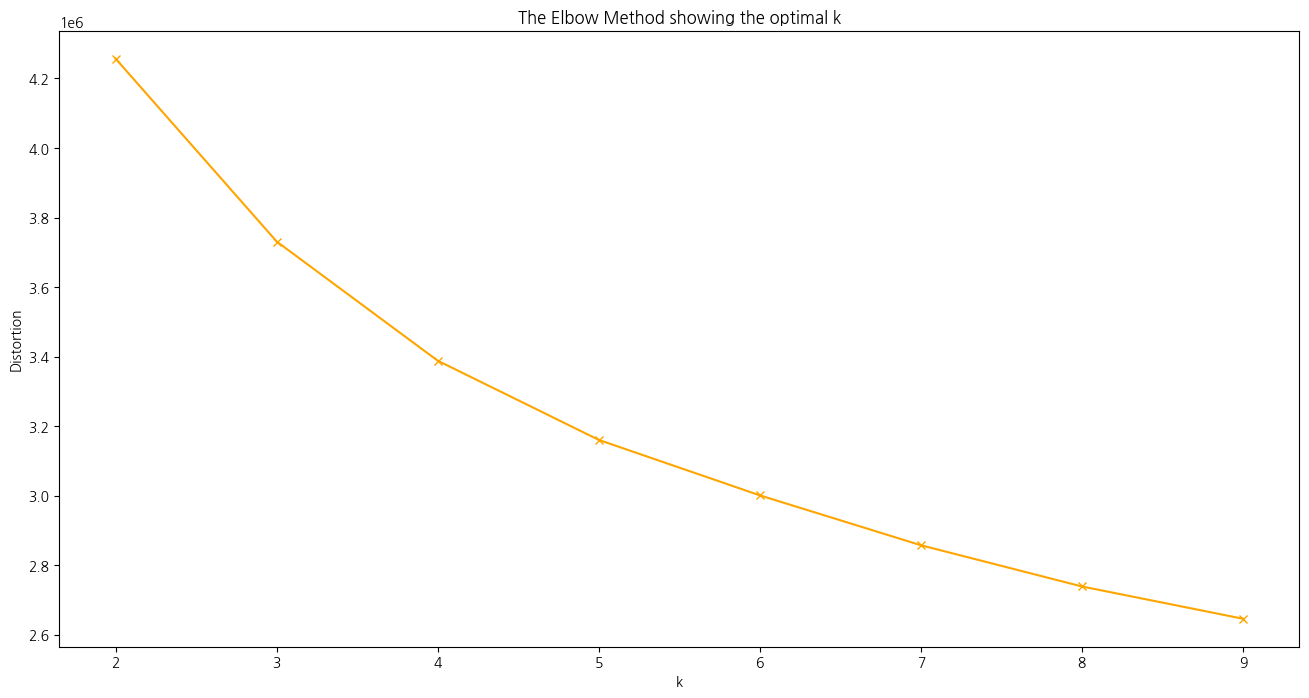

In [174]:
# Elbow Method
distortions = []
K = range(2,10)
for k in K:
     kmeanModel = KMeans(n_clusters=k)
     kmeanModel.fit(data_scaled)
     distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', color='orange')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [175]:
# Kmeans++
def get_kmeans_cluster(df, n):
    kmeans = KMeans(n_clusters =n, init = 'k-means++', max_iter =300, random_state = 723)
    kmeans.fit(df)
    df['cluster'] = kmeans.labels_

In [176]:
get_kmeans_cluster(data_scaled, 3)
data_scaled["cluster"].value_counts()

2    293580
0    228334
1    132625
Name: cluster, dtype: int64

In [177]:
lda_df = pd.DataFrame(X_lda)
lda_df["cluster"] = data_scaled["cluster"]
lda_df.head()

,0,1,2,cluster
0,-1.006103,-0.924537,-0.269078,1
1,0.424411,-0.450907,1.337221,0
2,1.156973,-1.043036,-0.493921,1
3,1.133939,-1.636573,-1.456908,1
4,-0.794389,-2.598877,-0.487652,1


In [178]:
# 3차원 공간에 투영하여 군집이 잘 나뉘어 졌는지 확인

%matplotlib inline
def get_3d_plot(df):
    fig = plt.figure( figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[2], df[1], df[0], c=df['cluster'], alpha=0.5)
    ax.set_xlabel('LDA components2')
    ax.set_ylabel('LDA components1')
    ax.set_zlabel('LDA components0')
    plt.show()

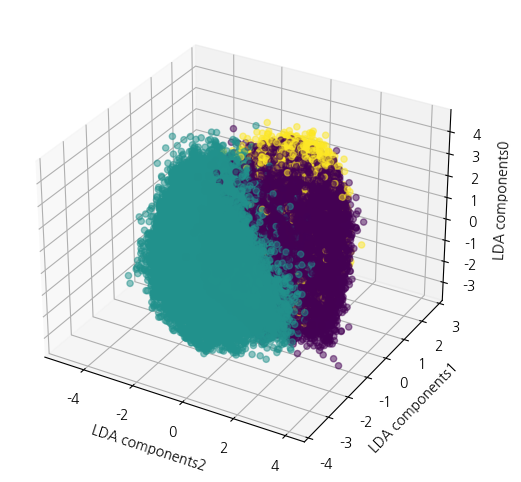

In [179]:
get_3d_plot(lda_df)

#### Cluster별 결과 해석

In [180]:
# 각 군집에 대한 해석을 위해 data_orginal에 공모횟수와 cluster 변수를 병합
data_original = pd.concat([data_original, y],axis=1)
data_original
data_original["cluster"] = data_scaled["cluster"]

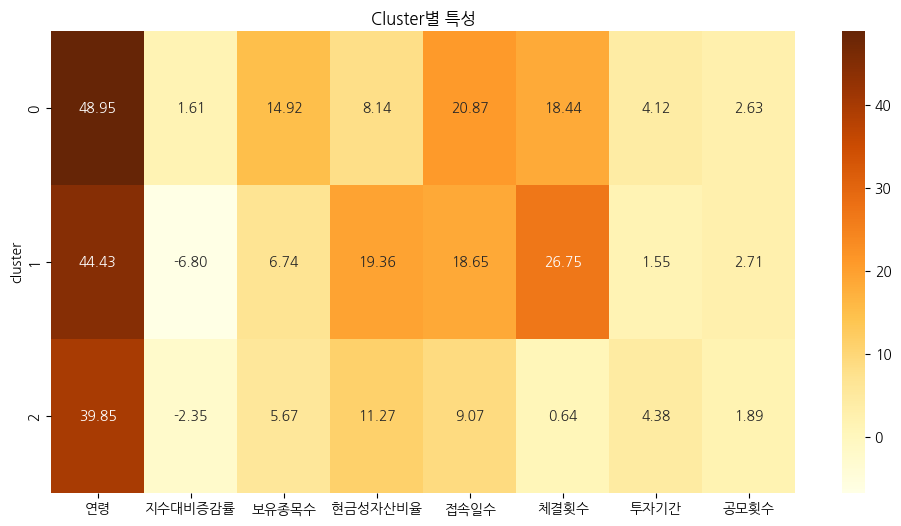

In [181]:
# Cluster별 특성 파악
cluster_means = data_original.groupby('cluster').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='YlOrBr', fmt='.2f')
plt.title('Cluster별 특성')
plt.show()